**The** `open()` **Function**

You can open a file for reading, writing or appending. To open a file, you can use the built-in open() function.
Here is the open() function’s arguments and defaults.<br>

`open(file, mode = 'r', buffering = -1, encoding = None,`<br>
        `errors = None, newline = None, 2 closefd = True, opener = None)`

When you open a file, you are required to pass in a file name or file path. The default when opening a file is to open it in read-only mode, which is what the ‘r’ means.
The following table goes over the other modes that can be used when opening a file.

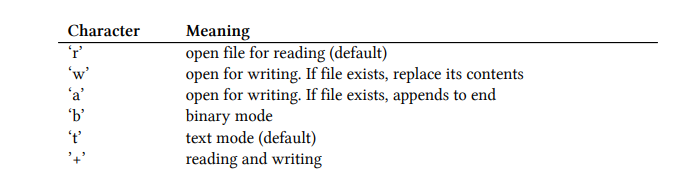

In [1]:
from IPython.display import Image
Image(filename = 'C:/Users/gwach/Desktop/Working with files.png')

- There are two(2) primary methods used to open a file.

In [2]:
file_handler = open('example.txt')
file_handler.close()

Here you open the file and you close it. But what happens if an exception occurs when you try to open the file? 

For example, let’s say you tried to open a file that didn’t exist. Or you opened a file, but you can’t write to it. These things happen and they can cause a file handle to be left open and
not closed properly.


One solution is to use try/finally:


In [3]:
try:
    file_handler = open('example.txt')
except:
    # ignore the error, print a warning, or log the exception
    pass
finally:
    file_handler.close()

However the best way to open a file in Python is to use Python’s special `with` statement. The `with` statement activates what is known as a context manager. Context managers are used when you want to set something up and tear something down. In this example, you want to open a file, do something and then close the file.

The core developers of Python made open() into a context manager. What that means is that you
can also open a file like this

In [4]:
with open('example.txt') as file_handler:
    # do something with the file_handler here
    data = file_handler.read()

What this does is it opens the file and assigns the file object to file_handler. Then any code that is indented to be inside of the with statement is considered to be a part of the context. 
That is where you would interact with the file handler, whether that be reading or writing to the file. Then when you get out of the with statement, it will automatically close the file.

It’s like having a finally statement that is built-in!
Now that you know how to open a file, let’s move on and learn how to read a file with Python.

**READING FILES**

Reading files with the Python programming language is pretty straight-forward. In fact, when you open a file and don't set the mode argument, the default is to open the file in "read-only" mode.
Here is an example:

In [5]:
with open('example.txt') as file_handler:
    for line in file_handler:
        print(line)

This is a text file

Here is some more text


The code above will open the text file and then loop over each line in the file and print it out. Yes, the `file_handler` can be iterated over using Python's for loop, which is very handy. In fact, this is actually one of the recommended methods for reading a file as you are reading it in chunks so that you won't run out of memory.

An alternative way to loop over the lines in a file would be to do the following instead

In [6]:
with open('example.txt') as file_handler:
    lines = file_handler.readlines()
    for line in lines:
        print(line)

This is a text file

Here is some more text


If you go this route, then you just read the entire file into memory. Depending on how much RAM your machine has in it, you may run out of memory. This is why the first method is recommended.

However, if you know the file is pretty small, there is another way to read the entire file into memory.

In [7]:
with open('example.txt') as file_handler:
    file_contents = file_handler.read()

The read() method will read the entire file into memory and assign it to your variable.
Occasionally, you may want to read a file in smaller or larger chunks. This can be done by specifying the size in bytes to read(). You could use a while loop for this

In [8]:
with open('example.txt') as file_handler:
    while True:
        data = file_handler.read(1024)
        if not data:
            break
        print(data)

This is a text file
Here is some more text


In this example, you read 1024 bytes at a time. When you call read() and it returns an empty string, then the while loop will stop because the break statement will get executed.

**Reading Binary Files**

Sometimes you will need to read a binary file. Python can do that too by combining the r mode with b.

In [9]:
with open('example.txt', 'rb') as file_handler:
    file_contents = file_handler.read()

Note that the second argument to open() is rb. That tells Python to open the file in read-only binary mode. If you were to print out the file_contents, you would see what amounts to gibberish as most binary documents are not human readable.

**Writing Files**

Writing a new file in Python uses pretty much the exact same syntax as reading. But instead of setting the mode to r, you set it to w for write-mode. If you need to write in binary mode, then you would open the file in wb mode.

**WARNING**: When using the w and wb modes, if the file already exists, you will end up overwriting it. Python does not warn you in any way.

Python does provide a way to check for a file's existence
by using the os module via os.path.exists(). See Python's documentation for more details.
Let's write a single line of text to a file:

In [10]:
with open('example1.txt', 'w') as file_handler:
    file_handler.write('This is a test')

The code above will write a single line of text to a file. If you write more text, it will be written right next to the previous text. So if you need to add a new line, then you will need to write one out using \n.
To verify that this worked, you can read the file and print out its contents:

In [11]:
with open('example1.txt') as file_handler:
    for line in file_handler:
        print(line)

This is a test


In [12]:
with open('example1.txt') as file_handler:
    print(file_handler.read())

This is a test


If you need to write multiple lines at once, you can use the writelines() method, which accepts a sequence of strings. 
You could use a list of strings and pass them to writelines(), for example.

**Understanding** `writelines()`:<br>
- It's a method availbale for file objects in Python.
- It accepts a sequence of strings (like a list) as input.
- It writes each string in the sequence to the file as a seperate line.
- It does not automatically add newline characters (\n) to the end of each string. You need to include those yourself if needed.

**Writing Lines from a List**

In [13]:
lines_to_write = ['This is line 1.\n', 'This is line 2.\n', 'This is line 3.']

with open('example2.txt', 'w') as file_handler:
    file_handler.writelines(lines_to_write)

In [14]:
with open('example2.txt') as file_handler:
    print(file_handler.read())

This is line 1.
This is line 2.
This is line 3.


**Writing Lines Using a** `for` **Loop**

In [15]:
lines_to_write = ['Line 1', 'Line 2', 'Line 3']

with open('example2.txt', 'w') as file_handler:
    for line in lines_to_write:
        file_handler.writelines(line + '\n')

In [16]:
with open('example2.txt') as file_handler:
    print(file_handler.read())

Line 1
Line 2
Line 3



**Seeking Within a File**

The file handler also provides one other method that is worth mentioning. That method is `seek()` which you can use to change the file object’s position. In other words, you can tell Python where in the file to start reading from.

The `seek()` method accepts two arguments:
- offset - A number of bytes from whence
- whence - The reference point

You can set whence to one of these three values:
- 0 - The beginning of the file(default)
- 1 - The current file position
- 2 - The end of the file

In [17]:
with open('example1.txt') as file_handler:
    file_handler.seek(4)
    chunk = file_handler.read()
    print(chunk)

 is a test


Here the file was opened in read-only mode. Then seeked to the 4th byte and read the rest of the file into the variable chunk. 
Finally, prints out the chunk and see that you have  only part of the file was retrieved.

**Appending to Files**

You can also append data to a pre-existing file using the `'a'` mode, which is the append mode.

Here is an example:

In [18]:
with open('example.txt', 'a') as file_handler:
    file_handler.write('Here is some more text')

In [19]:
with open('example.txt') as file_handler:
    print(file_handler.read())

This is a text file
Here is some more textHere is some more text


If the file exists, this will add a new string to the end of the file. On the other hand, if the file does not exist, Python will create the file and add this data to it.


**Catching File Exceptions**

When you are working with files, you will sometimes encounter errors.<br>
For example, you might not have the right permissions to create or edit the file. In that event, Python will raise an `OSError`. There are other errors that occasionally occur, but that is the most common one when working with files.<br>
You can use Python’s exception handling facilities to keep your program working:

In [20]:
try:
    with open('example.txt') as file_handler:
        for line in file_handler:
            print(line)
except OSError:
    print('An error occured')

This is a text file

Here is some more textHere is some more text


This code will attempt to open a file and print out its contents one line at a time. If an OSError is raised, you will catch it with the try/except and print out a message to the user.